In [88]:
import pandas as pd
A = pd.read_csv("C:/Users/tpasv/Desktop/Data Science/Data Science/Dataset/Placement_Data.csv")

In [89]:
A.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Preprocessing

In [90]:
A = A.drop(labels=["salary","sl_no"],axis=1)

In [91]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [92]:
replacer(A)

# EDA

In [93]:
import seaborn as sb
import matplotlib.pyplot as plt

In [94]:
cat = []
con = []
for i in A.columns:
    if (A[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

<AxesSubplot:xlabel='status', ylabel='mba_p'>

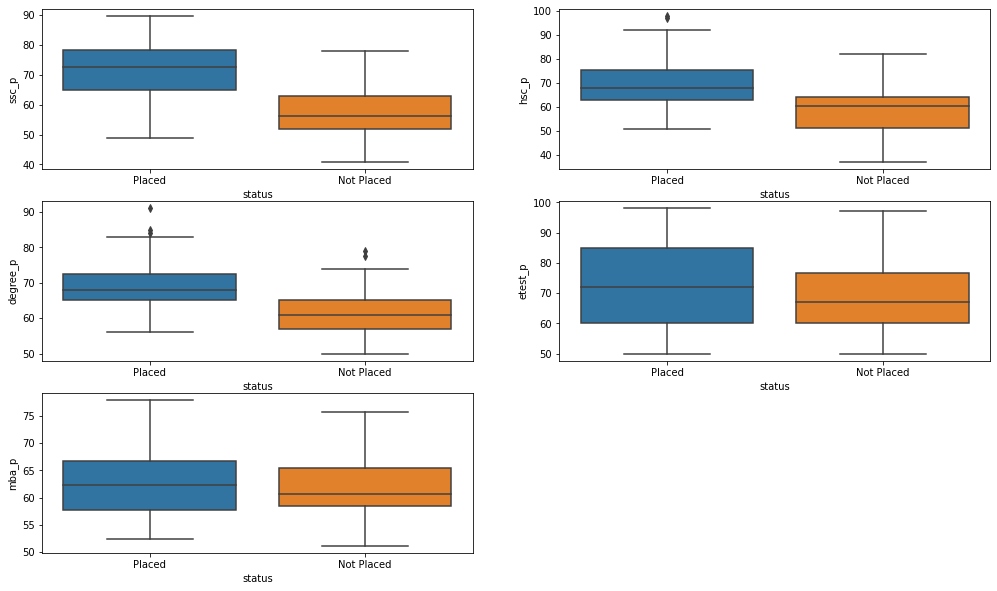

In [95]:
plt.figure(figsize=(17,10))
plt.subplot(3,2,1)
sb.boxplot(A.status,A.ssc_p)
plt.subplot(3,2,2)
sb.boxplot(A.status,A.hsc_p)
plt.subplot(3,2,3)
sb.boxplot(A.status,A.degree_p)
plt.subplot(3,2,4)
sb.boxplot(A.status,A.etest_p)
plt.subplot(3,2,5)
sb.boxplot(A.status,A.mba_p)

In [96]:
pd.crosstab(A.status,A.gender)

gender,F,M
status,,
Not Placed,28,39
Placed,48,100


In [97]:
pd.crosstab(A.status,A.ssc_b)

ssc_b,Central,Others
status,,
Not Placed,38,29
Placed,78,70


In [98]:
pd.crosstab(A.status,A.hsc_b)

hsc_b,Central,Others
status,,
Not Placed,27,40
Placed,57,91


In [99]:
pd.crosstab(A.status,A.hsc_s)

hsc_s,Arts,Commerce,Science
status,,,
Not Placed,5,34,28
Placed,6,79,63


In [100]:
pd.crosstab(A.status,A.degree_t)

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,43,6,18
Placed,102,5,41


In [101]:
pd.crosstab(A.status,A.workex)

workex,No,Yes
status,,
Not Placed,57,10
Placed,84,64


In [102]:
pd.crosstab(A.status,A.specialisation)

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


In [103]:
def ANOVA (con,cat,DF):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con+""+"~"+""+cat
    model = ols(rel,DF).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = pd.DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    print("%.40f"%a)

In [104]:
con

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [105]:
ANOVA("ssc_p","status",A)

0.0000000000000000000000411520104388495957


In [106]:
ANOVA("hsc_p","status",A)

0.0000000000000184921275693158862485091320


In [107]:
ANOVA("degree_p","status",A)

0.0000000000000880768213886280839284432041


In [108]:
ANOVA("etest_p","status",A)

0.0617203811101739927003073660216614371166


In [109]:
ANOVA("mba_p","status",A)

0.2614450019774863798183162089117104187608


# Creating Model for Training Data

In [110]:
Y = A[["status"]]
X = A[["ssc_p","hsc_p","degree_p","etest_p"]]
X = X.join(pd.get_dummies(A[["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"]]))

# Logistic Regression

In [111]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=9)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
accuracy_score(ytest,pred)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9302325581395349

# Decision Tree Classifier

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=25)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8837


# AdaBoost Classifier

In [113]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=17)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=5)
abc = AdaBoostClassifier(dtc1,random_state=8,n_estimators=4)
model = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.9070


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# KNeighbors Classifier

In [117]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=4)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model = knc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.9070


<ipython-input-117-b38c7577d877>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = knc.fit(xtrain,ytrain)


# Selected Model for Training

In [118]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=9)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
accuracy_score(ytest,pred)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9302325581395349

In [119]:
confusion_matrix(ytest,pred)

array([[ 5,  2],
       [ 1, 35]], dtype=int64)